In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [60]:
def fig2data(fig):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGB values
    """
    fig.canvas.draw()
    w,h = fig.canvas.get_width_height()
    buf = np.array(fig.canvas.renderer._renderer)
    return buf

In [61]:
def plot_original_data():
    df = pd.read_csv("../files/data.csv")
    plt.scatter(df['radio'], df['sales'], color='#1f77b4',marker = 'o')
    plt.xlabel("Radio, M$")
    plt.ylabel("Sales, Units")
    plt.title("Sales vs radio ad spendings")
    # plt.show()
    axes = plt.gca()
    axes.set_xlim([0,50])
    axes.set_ylim([0,35])
    plt.tight_layout()
    fig1 = plt.gcf()
    nfig = fig2data(fig1)
    seq.append(nfig)
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
    fig1.savefig('../files/gradient_descent-1.png', dpi=1000, bbox_inches = 'tight', pad_inches = 0)

In [64]:
df = pd.read_csv("../files/data.csv", index_col='Unnamed: 0')
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


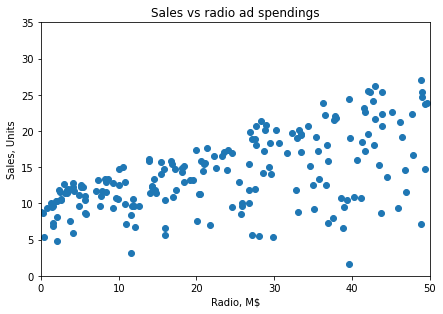

In [65]:
seq = []
plot_original_data()

In [66]:
def update_w_and_b(spendings,sales,w,b, alpha):
    dr_dw = 0.0
    dr_db = 0.0
    N = len(spendings)
    for i in range(N):
        dr_dw += -2*spendings[i]*(sales[i] - (w*spendings[i] + b))
        dr_db += -2*(sales[i] - (w*spendings[i] + b))
    # update w and b
    w = w - (dr_dw/float(N))*alpha
    b = b - (dr_db/float(N))*alpha
    return w,b

In [67]:
def loss(spendings,sales,w,b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error/N

In [68]:
def train(spendings,sales,w,b,alpha,epochs):
    image_counter = 2;
    for e in range(epochs):
        w, b = update_w_and_b(spendings,sales,w,b,alpha)
        # log the progress
        if (e==0) or (e<3000 and e%400==0) or (e%3000==0):
            print("epoch: ", str(e), "loss: "+str(loss(spendings,sales,w,b)))
            print("w, b: ",w,b)
            plt.figure(image_counter)
            plt.xlabel("spendings, M$")
            plt.ylabel("Sales, Units")
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,35])
            plt.scatter(spendings,sales,color='#1f77b4',marker='o' )
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot,X_plot*w + b)
            heading = 'epoch = '+str(e)+' loss = '+str(round(loss(spendings,sales,w,b)))
            plt.title(heading)
            #plt.show()
            plt.tight_layout()
            fig1 = plt.gcf()
            nfig = fig2data(fig1)
            seq.append(nfig)
            fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
            image_counter += 1
    return w,b

In [69]:
df = pd.read_csv("../files/data.csv")
x = df['radio']
y = df['sales']

epoch:  0 loss: 92.32078294903626
w, b:  0.7412639000000002 0.028045000000000007
epoch:  400 loss: 33.79131790081576
w, b:  0.4282720349432519 1.933428695950039
epoch:  800 loss: 27.9918542960729
w, b:  0.38178288442481695 3.4526614981614254
epoch:  1200 loss: 24.33481690722147
w, b:  0.34486622481754114 4.659072017562193
epoch:  1600 loss: 22.028754937538633
w, b:  0.31555100306447775 5.617072884316986
epoch:  2000 loss: 20.57459375662496
w, b:  0.2922720218247468 6.3778136487118635
epoch:  2400 loss: 19.657625883308423
w, b:  0.273786370509382 6.98191175623499
epoch:  2800 loss: 19.07940244306619
w, b:  0.25910706384066806 7.461621192869828
epoch:  3000 loss: 18.876170218021276
w, b:  0.2529431349721907 7.663054061034952
epoch:  6000 loss: 18.117072440822145
w, b:  0.21144673626951038 9.019127238963959
epoch:  9000 loss: 18.0931745529731
w, b:  0.20408396502930684 9.259737434215003


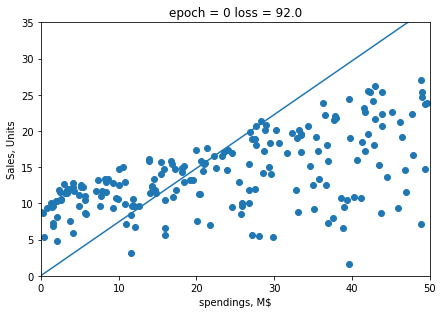

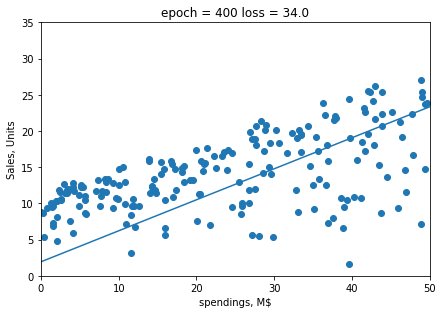

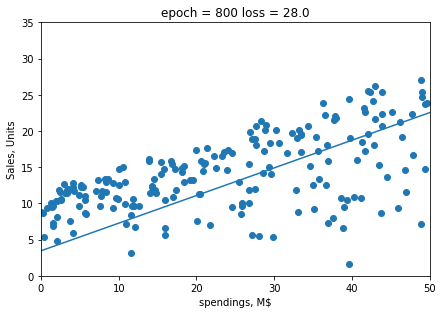

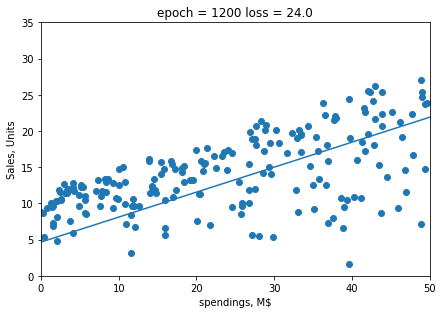

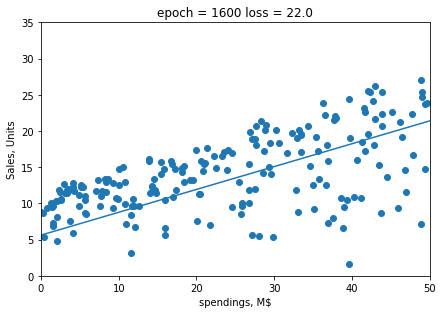

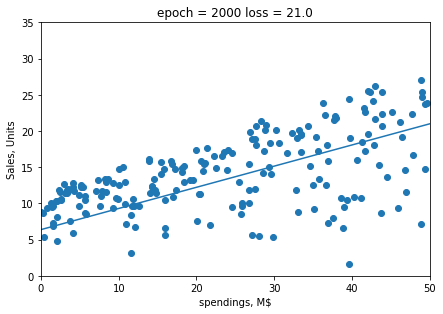

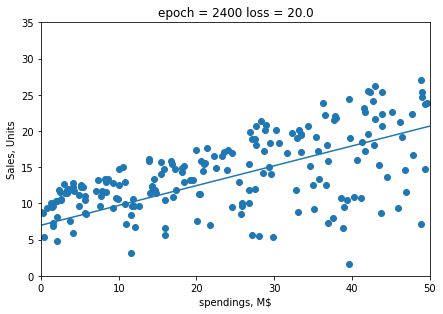

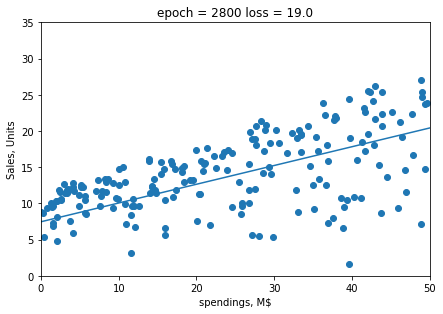

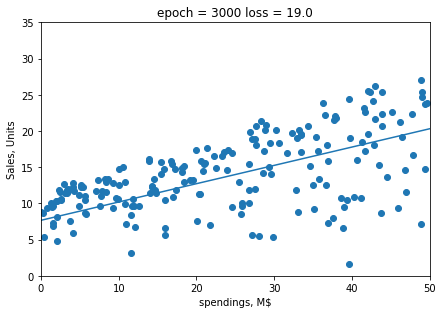

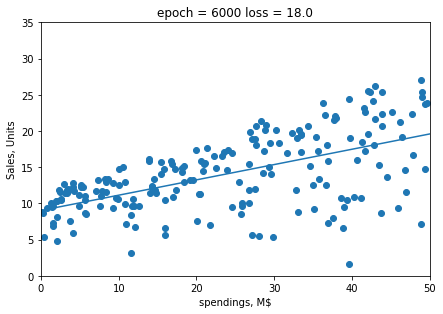

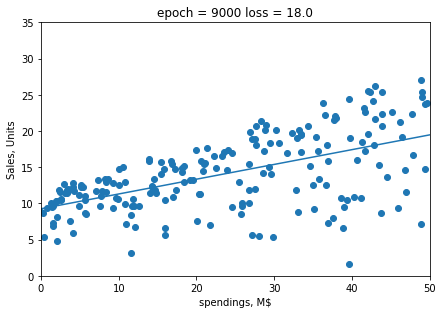

In [70]:
w,b = train(x,y,0.0,0.0,0.001,10000)

In [88]:
def predict(x,w,b):
    return w*x + b
x_new = 23.0
y_new = predict(x_new, w, b)
print(y_new)

13.960397977729219


In [89]:
def train(x,y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression().fit(x, y)
    return model

In [92]:
df = pd.read_csv("../files/data.csv")
x = df['radio']
y = df['sales']
model = train(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

# x_new = 23.0
# y_new = model.predict(x_new)
# print(y_new)